**문제정의: 전국에서 신도림동의 연령별 인구구조와 가장 형태가 비슷한 지역은 어디일까?**

한글깨짐 파일 

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


1.테이터 읽어오기

In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

df = pandas.read_csv('/content/age.csv',encoding='cp949',index_col=0)

df.head()

,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),9770638,9770638,53738,59599,65815,70726,70037,69000,76377,73745,75639,70189,74217,80273,74774,71529,78329,82561,82083,90416,107254,109552,114315,122473,129497,141673,150625,156258,165662,165771,152776,151006,150177,144503,144300,145260,142644,157624,164934,168159,...,142867,132352,135608,123861,103339,110202,83062,85623,88133,85983,86008,79560,60652,63418,59401,72043,60979,49561,47432,42445,37293,33253,29705,25250,20503,17751,14506,12100,10729,8923,7199,5374,3972,2927,2813,2260,1565,1180,880,5932
서울특별시 종로구 (1111000000),152880,152880,593,683,775,874,852,863,1023,904,1012,923,1004,1151,1084,1005,1099,1180,1171,1338,1528,1767,1899,2122,2193,2454,2438,2572,2682,2598,2446,2234,2206,2161,2060,1949,1888,2149,2116,2219,...,2267,2204,2185,2014,1665,1796,1362,1387,1454,1432,1512,1369,1099,1215,1144,1424,1245,1044,1065,894,763,725,626,572,462,395,336,282,236,199,163,132,112,79,69,81,53,40,39,236
서울특별시 종로구 청운효자동(1111051500),13010,13010,66,79,72,98,98,94,108,109,115,95,125,142,130,105,136,124,134,151,155,147,172,143,181,188,139,163,171,186,151,137,168,157,172,160,162,193,178,232,...,150,138,160,131,132,124,91,103,115,106,119,118,95,103,92,125,94,87,103,83,64,67,62,47,47,31,30,12,21,14,9,8,14,6,7,9,4,2,2,16
서울특별시 종로구 사직동(1111053000),9584,9584,43,50,64,67,67,70,94,65,82,64,88,73,88,70,64,75,77,68,81,96,95,110,93,103,127,120,151,139,137,126,127,169,150,124,120,138,147,146,...,137,139,117,114,106,116,65,91,85,85,95,78,74,80,68,80,82,75,66,68,60,53,60,51,38,26,22,22,20,17,14,5,12,6,5,8,2,5,4,17
서울특별시 종로구 삼청동(1111054000),2820,2820,9,15,3,21,11,13,9,16,14,25,18,27,20,17,19,17,17,27,23,27,25,36,29,35,35,33,37,31,36,42,46,35,35,41,32,42,45,57,...,46,41,51,51,27,45,23,24,36,34,43,31,19,28,23,33,34,25,26,15,18,20,16,14,14,14,10,8,8,4,6,6,1,3,0,3,1,0,2,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3841 entries, 서울특별시  (1100000000) to 제주특별자치도 서귀포시 예래동(5013062000)
Columns: 103 entries, 총인구수 to 100세 이상
dtypes: int64(103)
memory usage: 3.0+ MB


**인구수 -> 인구비율로 데이터 전처리**

In [ ]:
df.head()

,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),9770638,9770638,53738,59599,65815,70726,70037,69000,76377,73745,75639,70189,74217,80273,74774,71529,78329,82561,82083,90416,107254,109552,114315,122473,129497,141673,150625,156258,165662,165771,152776,151006,150177,144503,144300,145260,142644,157624,164934,168159,...,142867,132352,135608,123861,103339,110202,83062,85623,88133,85983,86008,79560,60652,63418,59401,72043,60979,49561,47432,42445,37293,33253,29705,25250,20503,17751,14506,12100,10729,8923,7199,5374,3972,2927,2813,2260,1565,1180,880,5932
서울특별시 종로구 (1111000000),152880,152880,593,683,775,874,852,863,1023,904,1012,923,1004,1151,1084,1005,1099,1180,1171,1338,1528,1767,1899,2122,2193,2454,2438,2572,2682,2598,2446,2234,2206,2161,2060,1949,1888,2149,2116,2219,...,2267,2204,2185,2014,1665,1796,1362,1387,1454,1432,1512,1369,1099,1215,1144,1424,1245,1044,1065,894,763,725,626,572,462,395,336,282,236,199,163,132,112,79,69,81,53,40,39,236
서울특별시 종로구 청운효자동(1111051500),13010,13010,66,79,72,98,98,94,108,109,115,95,125,142,130,105,136,124,134,151,155,147,172,143,181,188,139,163,171,186,151,137,168,157,172,160,162,193,178,232,...,150,138,160,131,132,124,91,103,115,106,119,118,95,103,92,125,94,87,103,83,64,67,62,47,47,31,30,12,21,14,9,8,14,6,7,9,4,2,2,16
서울특별시 종로구 사직동(1111053000),9584,9584,43,50,64,67,67,70,94,65,82,64,88,73,88,70,64,75,77,68,81,96,95,110,93,103,127,120,151,139,137,126,127,169,150,124,120,138,147,146,...,137,139,117,114,106,116,65,91,85,85,95,78,74,80,68,80,82,75,66,68,60,53,60,51,38,26,22,22,20,17,14,5,12,6,5,8,2,5,4,17
서울특별시 종로구 삼청동(1111054000),2820,2820,9,15,3,21,11,13,9,16,14,25,18,27,20,17,19,17,17,27,23,27,25,36,29,35,35,33,37,31,36,42,46,35,35,41,32,42,45,57,...,46,41,51,51,27,45,23,24,36,34,43,31,19,28,23,33,34,25,26,15,18,20,16,14,14,14,10,8,8,4,6,6,1,3,0,3,1,0,2,7


In [ ]:
df = df.div(df['총인구수'],axis=0) #전체 데이터를 총 인구수로 나눠서 비율로 변환

df.head()

,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),1.0,1.0,0.005500,0.006100,0.006736,0.007239,0.007168,0.007062,0.007817,0.007548,0.007741,0.007184,0.007596,0.008216,0.007653,0.007321,0.008017,0.008450,0.008401,0.009254,0.010977,0.011212,0.011700,0.012535,0.013254,0.014500,0.015416,0.015993,0.016955,0.016966,0.015636,0.015455,0.015370,0.014790,0.014769,0.014867,0.014599,0.016132,0.016881,0.017211,...,0.014622,0.013546,0.013879,0.012677,0.010576,0.011279,0.008501,0.008763,0.009020,0.008800,0.008803,0.008143,0.006208,0.006491,0.006080,0.007373,0.006241,0.005072,0.004855,0.004344,0.003817,0.003403,0.003040,0.002584,0.002098,0.001817,0.001485,0.001238,0.001098,0.000913,0.000737,0.000550,0.000407,0.000300,0.000288,0.000231,0.000160,0.000121,0.000090,0.000607
서울특별시 종로구 (1111000000),1.0,1.0,0.003879,0.004468,0.005069,0.005717,0.005573,0.005645,0.006692,0.005913,0.006620,0.006037,0.006567,0.007529,0.007091,0.006574,0.007189,0.007718,0.007660,0.008752,0.009995,0.011558,0.012422,0.013880,0.014345,0.016052,0.015947,0.016824,0.017543,0.016994,0.015999,0.014613,0.014430,0.014135,0.013475,0.012749,0.012350,0.014057,0.013841,0.014515,...,0.014829,0.014417,0.014292,0.013174,0.010891,0.011748,0.008909,0.009072,0.009511,0.009367,0.009890,0.008955,0.007189,0.007947,0.007483,0.009314,0.008144,0.006829,0.006966,0.005848,0.004991,0.004742,0.004095,0.003741,0.003022,0.002584,0.002198,0.001845,0.001544,0.001302,0.001066,0.000863,0.000733,0.000517,0.000451,0.000530,0.000347,0.000262,0.000255,0.001544
서울특별시 종로구 청운효자동(1111051500),1.0,1.0,0.005073,0.006072,0.005534,0.007533,0.007533,0.007225,0.008301,0.008378,0.008839,0.007302,0.009608,0.010915,0.009992,0.008071,0.010453,0.009531,0.010300,0.011606,0.011914,0.011299,0.013221,0.010992,0.013912,0.014450,0.010684,0.012529,0.013144,0.014297,0.011606,0.010530,0.012913,0.012068,0.013221,0.012298,0.012452,0.014835,0.013682,0.017832,...,0.011530,0.010607,0.012298,0.010069,0.010146,0.009531,0.006995,0.007917,0.008839,0.008148,0.009147,0.009070,0.007302,0.007917,0.007071,0.009608,0.007225,0.006687,0.007917,0.006380,0.004919,0.005150,0.004766,0.003613,0.003613,0.002383,0.002306,0.000922,0.001614,0.001076,0.000692,0.000615,0.001076,0.000461,0.000538,0.000692,0.000307,0.000154,0.000154,0.001230
서울특별시 종로구 사직동(1111053000),1.0,1.0,0.004487,0.005217,0.006678,0.006991,0.006991,0.007304,0.009808,0.006782,0.008556,0.006678,0.009182,0.007617,0.009182,0.007304,0.006678,0.007826,0.008034,0.007095,0.008452,0.010017,0.009912,0.011477,0.009704,0.010747,0.013251,0.012521,0.015755,0.014503,0.014295,0.013147,0.013251,0.017634,0.015651,0.012938,0.012521,0.014399,0.015338,0.015234,...,0.014295,0.014503,0.012208,0.011895,0.011060,0.012104,0.006782,0.009495,0.008869,0.008869,0.009912,0.008139,0.007721,0.008347,0.007095,0.008347,0.008556,0.007826,0.006886,0.007095,0.006260,0.005530,0.006260,0.005321,0.003965,0.002713,0.002295,0.002295,0.002087,0.001774,0.001461,0.000522,0.001252,0.000626,0.000522,0.000835,0.000209,0.000522,0.000417,0.001774
서울특별시 종로구 삼청동(1111054000),1.0,1.0,0.003191,0.005319,0.001064,0.007447,0.003901,0.004610,0.003191,0.005674,0.004965,0.008865,0.006383,0.009574,0.007092,0.006028,0.006738,0.006028,0.006028,0.009574,0.008156,0.009574,0.008865,0.012766,0.010284,0.012411,0.012411,0.011702,0.013121,0.010993,0.012766,0.014894,0.016312,0.012411,0.012411,0.014539,0.011348,0.014894,0.015957,0.020213,...,0.016312,0.014539,0.018085,0.018085,0.009574,0.015957,0.008156,0.008511,0.012766,0.012057,0.015248,0.010993,0.006738,0.009929,0.008156,0.011702,0.012057,0.008865,0.009220,0.005319,0.006383,0.007092,0.005674,0.004965,0.004965,0.004965,0.003546,0.002837,0.0028

In [ ]:
del df['총인구수'], df['연령구간인구수'] # 총인구, 연령구간인구수 삭제
df.head()


,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,38세,39세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),0.005500,0.006100,0.006736,0.007239,0.007168,0.007062,0.007817,0.007548,0.007741,0.007184,0.007596,0.008216,0.007653,0.007321,0.008017,0.008450,0.008401,0.009254,0.010977,0.011212,0.011700,0.012535,0.013254,0.014500,0.015416,0.015993,0.016955,0.016966,0.015636,0.015455,0.015370,0.014790,0.014769,0.014867,0.014599,0.016132,0.016881,0.017211,0.016667,0.016582,...,0.014622,0.013546,0.013879,0.012677,0.010576,0.011279,0.008501,0.008763,0.009020,0.008800,0.008803,0.008143,0.006208,0.006491,0.006080,0.007373,0.006241,0.005072,0.004855,0.004344,0.003817,0.003403,0.003040,0.002584,0.002098,0.001817,0.001485,0.001238,0.001098,0.000913,0.000737,0.000550,0.000407,0.000300,0.000288,0.000231,0.000160,0.000121,0.000090,0.000607
서울특별시 종로구 (1111000000),0.003879,0.004468,0.005069,0.005717,0.005573,0.005645,0.006692,0.005913,0.006620,0.006037,0.006567,0.007529,0.007091,0.006574,0.007189,0.007718,0.007660,0.008752,0.009995,0.011558,0.012422,0.013880,0.014345,0.016052,0.015947,0.016824,0.017543,0.016994,0.015999,0.014613,0.014430,0.014135,0.013475,0.012749,0.012350,0.014057,0.013841,0.014515,0.014410,0.014240,...,0.014829,0.014417,0.014292,0.013174,0.010891,0.011748,0.008909,0.009072,0.009511,0.009367,0.009890,0.008955,0.007189,0.007947,0.007483,0.009314,0.008144,0.006829,0.006966,0.005848,0.004991,0.004742,0.004095,0.003741,0.003022,0.002584,0.002198,0.001845,0.001544,0.001302,0.001066,0.000863,0.000733,0.000517,0.000451,0.000530,0.000347,0.000262,0.000255,0.001544
서울특별시 종로구 청운효자동(1111051500),0.005073,0.006072,0.005534,0.007533,0.007533,0.007225,0.008301,0.008378,0.008839,0.007302,0.009608,0.010915,0.009992,0.008071,0.010453,0.009531,0.010300,0.011606,0.011914,0.011299,0.013221,0.010992,0.013912,0.014450,0.010684,0.012529,0.013144,0.014297,0.011606,0.010530,0.012913,0.012068,0.013221,0.012298,0.012452,0.014835,0.013682,0.017832,0.018063,0.017371,...,0.011530,0.010607,0.012298,0.010069,0.010146,0.009531,0.006995,0.007917,0.008839,0.008148,0.009147,0.009070,0.007302,0.007917,0.007071,0.009608,0.007225,0.006687,0.007917,0.006380,0.004919,0.005150,0.004766,0.003613,0.003613,0.002383,0.002306,0.000922,0.001614,0.001076,0.000692,0.000615,0.001076,0.000461,0.000538,0.000692,0.000307,0.000154,0.000154,0.001230
서울특별시 종로구 사직동(1111053000),0.004487,0.005217,0.006678,0.006991,0.006991,0.007304,0.009808,0.006782,0.008556,0.006678,0.009182,0.007617,0.009182,0.007304,0.006678,0.007826,0.008034,0.007095,0.008452,0.010017,0.009912,0.011477,0.009704,0.010747,0.013251,0.012521,0.015755,0.014503,0.014295,0.013147,0.013251,0.017634,0.015651,0.012938,0.012521,0.014399,0.015338,0.015234,0.016590,0.013982,...,0.014295,0.014503,0.012208,0.011895,0.011060,0.012104,0.006782,0.009495,0.008869,0.008869,0.009912,0.008139,0.007721,0.008347,0.007095,0.008347,0.008556,0.007826,0.006886,0.007095,0.006260,0.005530,0.006260,0.005321,0.003965,0.002713,0.002295,0.002295,0.002087,0.001774,0.001461,0.000522,0.001252,0.000626,0.000522,0.000835,0.000209,0.000522,0.000417,0.001774
서울특별시 종로구 삼청동(1111054000),0.003191,0.005319,0.001064,0.007447,0.003901,0.004610,0.003191,0.005674,0.004965,0.008865,0.006383,0.009574,0.007092,0.006028,0.006738,0.006028,0.006028,0.009574,0.008156,0.009574,0.008865,0.012766,0.010284,0.012411,0.012411,0.011702,0.013121,0.010993,0.012766,0.014894,0.016312,0.012411,0.012411,0.014539,0.011348,0.014894,0.015957,0.020213,0.015248,0.017021,...,0.016312,0.014539,0.018085,0.018085,0.009574,0.015957,0.008156,0.008511,0.012766,0.012057,0.015248,0.010993,0.006738,0.009929,0.008156,0.011702,0.012057,0.008865,0.009220,0.005319,0.006383,0.007092,0.005674,0.0049

**2~3. 궁금한 지역 이름 받고 해당 지역의 인구 구조 저장하기**

In [ ]:
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요:') #지역 이름입력 받은다음
a = df.index.str.contains(name) # 3.해당 행의 인덱스를 찾아서 인구 구조를 저장

df2 =df[a] # 인구 구조를 저장

df2.head()

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요:신도림동


,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,38세,39세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 구로구 신도림동(1153051000),0.008747,0.008962,0.010894,0.011082,0.010438,0.010948,0.011189,0.011645,0.011028,0.010384,0.01127,0.010277,0.009499,0.009579,0.009123,0.009069,0.009365,0.009096,0.010921,0.010196,0.010465,0.012155,0.011377,0.013846,0.012102,0.012504,0.012021,0.012987,0.012638,0.012772,0.014973,0.014516,0.015536,0.016609,0.017119,0.019856,0.020285,0.021251,0.01999,0.021171,...,0.012236,0.011431,0.013336,0.01017,0.010304,0.010706,0.007486,0.007755,0.007406,0.007191,0.007272,0.005984,0.004562,0.004025,0.004132,0.004749,0.003757,0.003381,0.003059,0.003247,0.002603,0.002308,0.002147,0.001583,0.001288,0.001181,0.001154,0.000751,0.000778,0.00059,0.000402,0.000349,0.000322,0.000134,0.000215,0.000134,0.000107,0.000054,0.00008,0.000188


**궁금한 지역 인구구조 시각화**

In [ ]:
df2.T

행정구역,서울특별시 구로구 신도림동(1153051000)
0세,0.008747
1세,0.008962
2세,0.010894
3세,0.011082
4세,0.010438
...,...
96세,0.000134
97세,0.000107
98세,0.000054
99세,0.000080


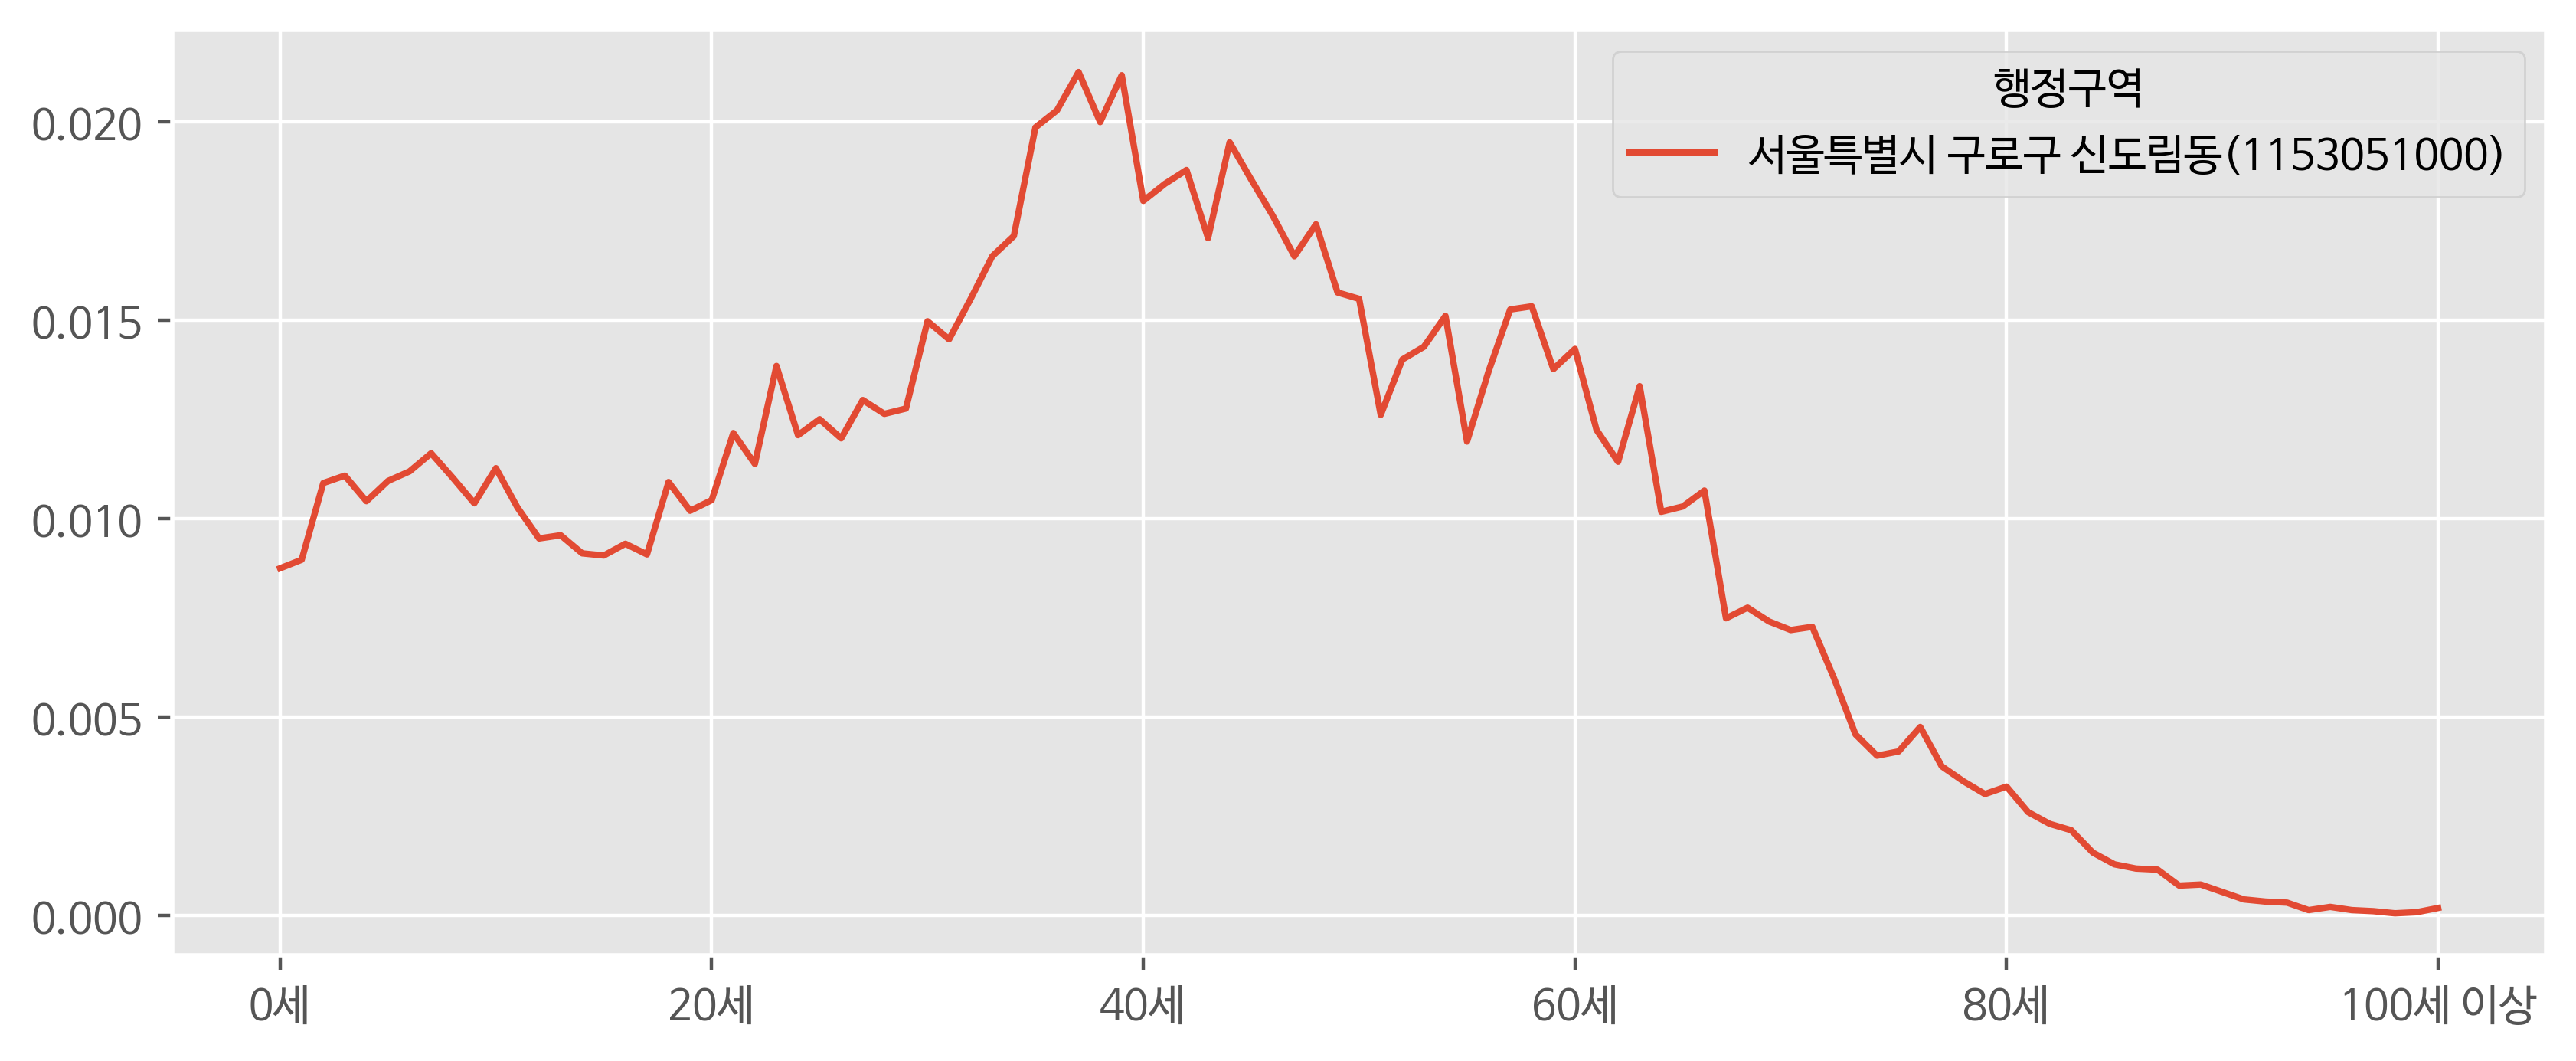

In [ ]:
import matplotlib.pyplot as plt



#데이터 시각화
plt.rcParams['figure.figsize'] = (10,4)
plt.rcParams['figure.dpi'] = 200
plt.style.use('ggplot')
df2.T.plot()
plt.show()

In [ ]:
df.sub(df2.iloc[0],axis=1) #home - away

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,38세,39세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),-0.003248,-0.002862,-0.004158,-0.003843,-0.003270,-0.003886,-0.003372,-0.004098,-0.003287,-0.003201,-0.003674,-0.002061,-0.001846,-0.002258,-0.001106,-0.000620,-0.000964,0.000158,0.000056,0.001016,0.001235,0.000380,0.001877,0.000654,0.003315,0.003489,0.004934,0.003979,0.002998,0.002683,0.000398,0.000273,-0.000767,-0.001742,-0.002520,-0.003724,-0.003405,-0.004041,-0.003324,-0.004589,...,0.002386,0.002115,0.000543,0.002507,0.000273,0.000573,0.001015,0.001009,0.001614,0.001609,0.001531,0.002159,0.001646,0.002466,0.001947,0.002624,0.002484,0.001692,0.001796,0.001097,0.001214,0.001096,0.000894,0.001001,0.000810,0.000636,0.000331,0.000487,0.000320,0.000323,0.000334,0.000201,0.000085,0.000165,0.000073,0.000097,0.000053,0.000067,0.000010,0.000419
서울특별시 종로구 (1111000000),-0.004869,-0.004495,-0.005825,-0.005365,-0.004865,-0.005303,-0.004498,-0.005732,-0.004409,-0.004347,-0.004702,-0.002748,-0.002408,-0.003005,-0.001934,-0.001351,-0.001705,-0.000344,-0.000926,0.001362,0.001957,0.001725,0.002968,0.002206,0.003846,0.004320,0.005522,0.004007,0.003361,0.001840,-0.000543,-0.000381,-0.002061,-0.003861,-0.004770,-0.005799,-0.006445,-0.006737,-0.005580,-0.006931,...,0.002593,0.002986,0.000956,0.003004,0.000587,0.001042,0.001423,0.001318,0.002105,0.002176,0.002618,0.002971,0.002627,0.003923,0.003351,0.004565,0.004387,0.003448,0.003907,0.002601,0.002388,0.002435,0.001948,0.002158,0.001734,0.001403,0.001044,0.001093,0.000766,0.000711,0.000664,0.000515,0.000411,0.000383,0.000237,0.000396,0.000239,0.000208,0.000175,0.001356
서울특별시 종로구 청운효자동(1111051500),-0.003674,-0.002890,-0.005360,-0.003549,-0.002905,-0.003723,-0.002888,-0.003267,-0.002189,-0.003082,-0.001662,0.000638,0.000494,-0.001509,0.001330,0.000462,0.000935,0.002510,0.000993,0.001103,0.002756,-0.001164,0.002535,0.000605,-0.001417,0.000025,0.001123,0.001310,-0.001032,-0.002242,-0.002059,-0.002449,-0.002316,-0.004311,-0.004667,-0.005021,-0.006604,-0.003419,-0.001927,-0.003800,...,-0.000706,-0.000823,-0.001038,-0.000100,-0.000158,-0.001175,-0.000492,0.000162,0.001434,0.000956,0.001875,0.003086,0.002741,0.003892,0.002939,0.004859,0.003469,0.003306,0.004858,0.003133,0.002317,0.002842,0.002619,0.002029,0.002325,0.001202,0.001152,0.000171,0.000836,0.000486,0.000289,0.000266,0.000754,0.000327,0.000323,0.000558,0.000200,0.000100,0.000073,0.001042
서울특별시 종로구 사직동(1111053000),-0.004261,-0.003745,-0.004216,-0.004091,-0.003447,-0.003644,-0.001381,-0.004863,-0.002472,-0.003706,-0.002088,-0.002660,-0.000317,-0.002275,-0.002445,-0.001244,-0.001330,-0.002001,-0.002469,-0.000180,-0.000552,-0.000678,-0.001673,-0.003099,0.001150,0.000017,0.003734,0.001516,0.001656,0.000375,-0.001721,0.003117,0.000115,-0.003671,-0.004598,-0.005457,-0.004947,-0.006018,-0.003400,-0.007189,...,0.002059,0.003073,-0.001128,0.001725,0.000756,0.001397,-0.000704,0.001740,0.001463,0.001678,0.002641,0.002155,0.003160,0.004322,0.002963,0.003598,0.004799,0.004445,0.003828,0.003848,0.003658,0.003222,0.004114,0.003738,0.002677,0.001532,0.001142,0.001544,0.001309,0.001183,0.001058,0.000173,0.000930,0.000492,0.000307,0.000701,0.000101,0.000468,0.000337,0.001586
서울특별시 종로구 삼청동(1111054000),-0.005556,-0.003643,-0.009830,-0.003635,-0.006537,-0.006338,-0.007998,-0.005972,-0.006064,-0.001519,-0.004887,-0.000702,-0.002407,-0.003551,-0.002386,-0.003041,-0.003336,0.000478,-0.002765,-0.000622,-0.001599,0.000611,-0.001093,-0.001434,0.000310,-0.000802,0.001100,-0.001994,0.000128,0.002121,0.001339,-0.002105,-0.003125,-0.002070,-0.005772,-0.004963,-0.004328,-0.001039,-0.004742,-0.004150,...,0.004076,0.003108,0.004749,0.007916,-0.000729,0.005251,0.00

In [ ]:
df2.iloc[0]

0세         0.008747
1세         0.008962
2세         0.010894
3세         0.011082
4세         0.010438
             ...   
96세        0.000134
97세        0.000107
98세        0.000054
99세        0.000080
100세 이상    0.000188
Name: 서울특별시 구로구 신도림동(1153051000), Length: 101, dtype: float64

In [ ]:
df2.sub(df2.iloc[0],axis=1).sum(axis =1).sort_values().index[:5] #home - away


Index(['서울특별시 구로구 신도림동(1153051000)'], dtype='object', name='행정구역')

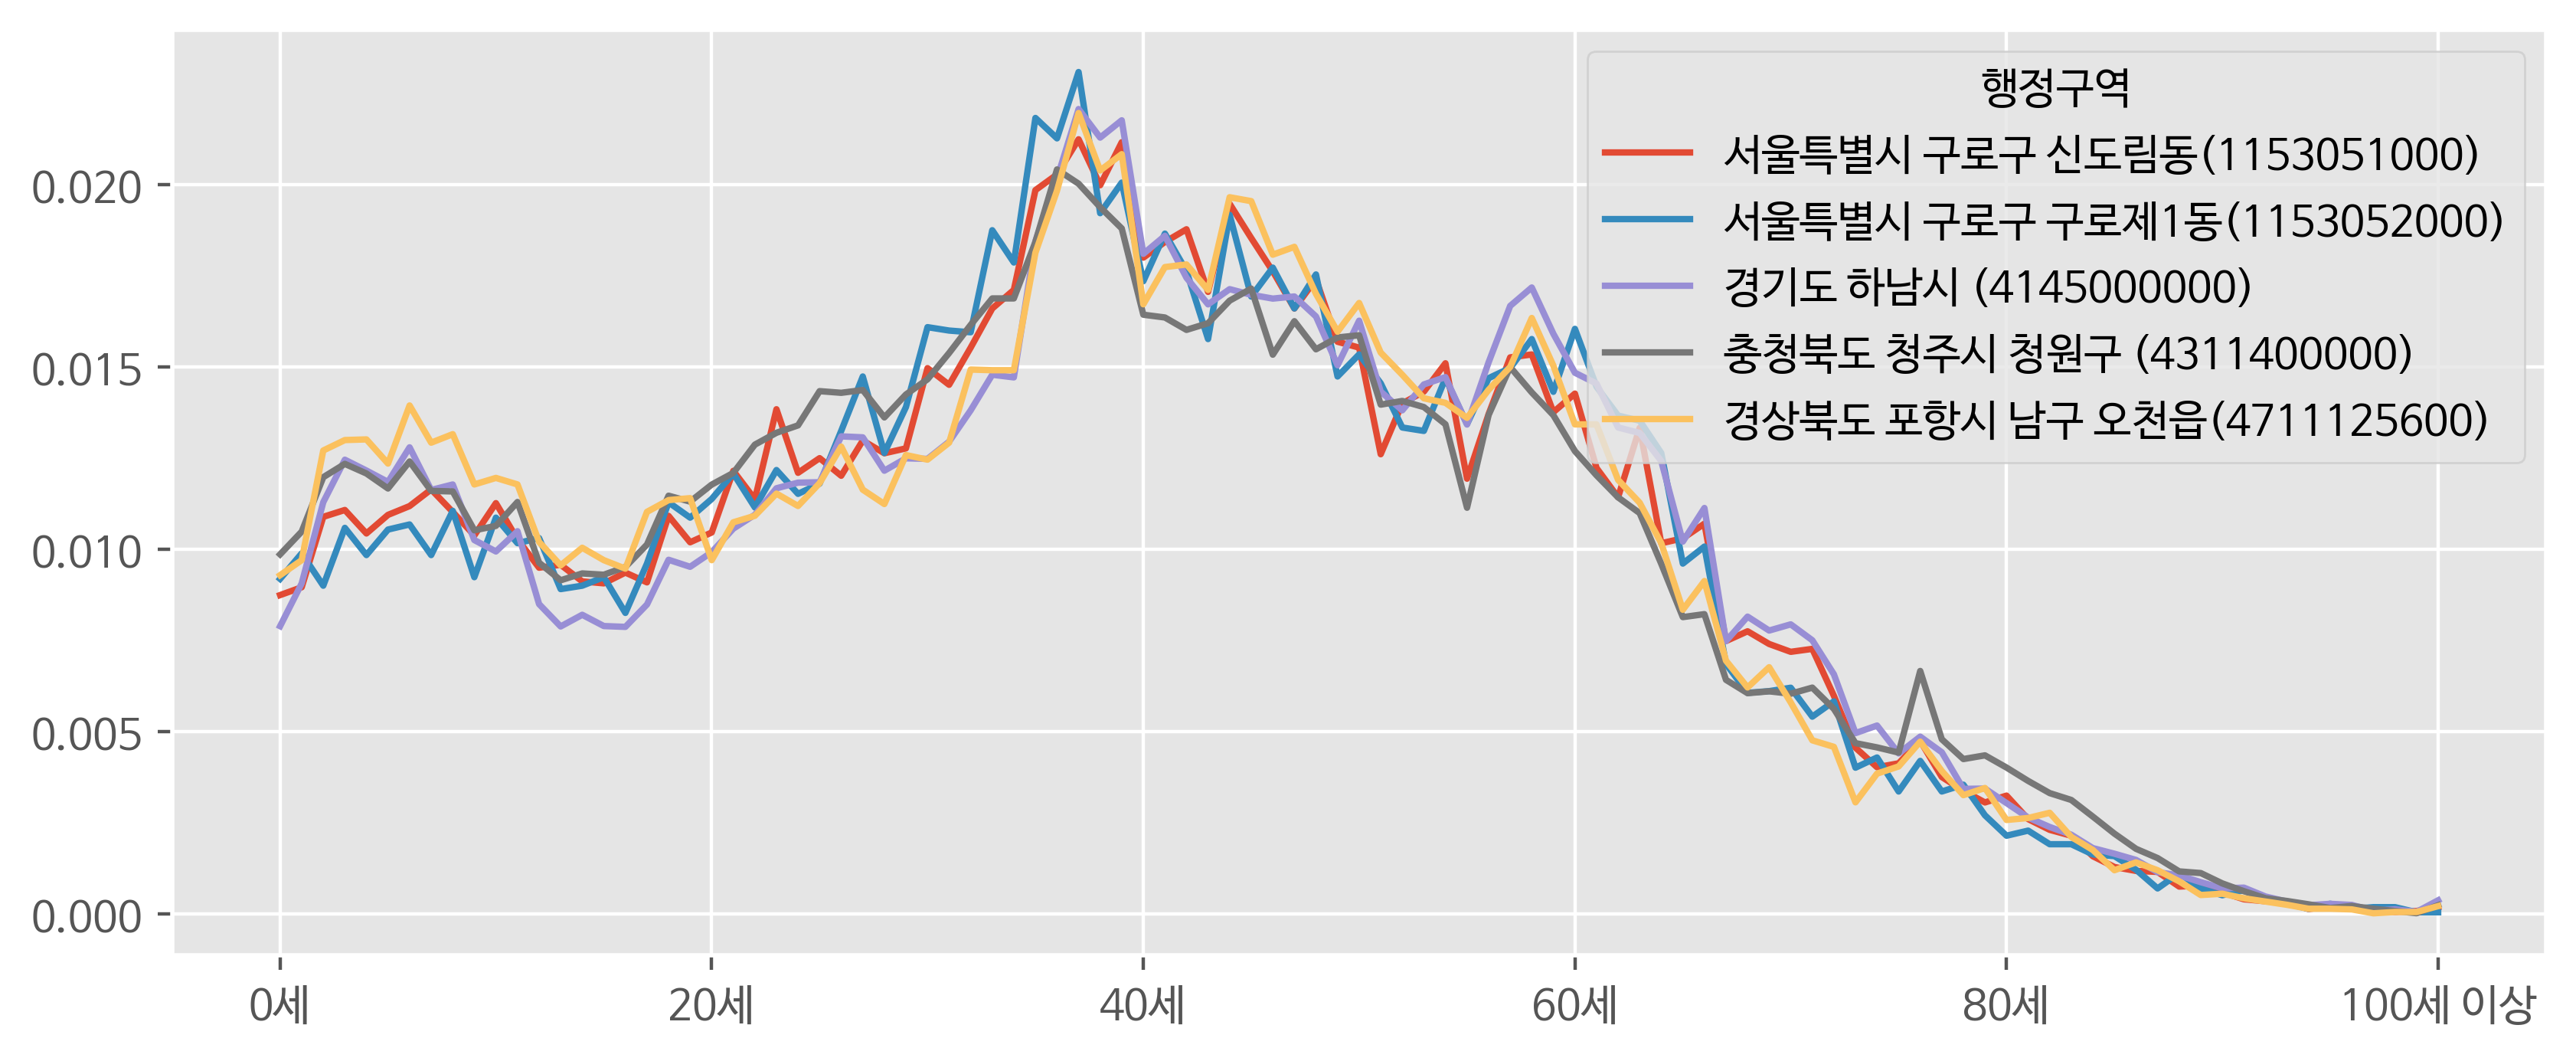

In [ ]:
import numpy as np

df.loc[np.power(df.sub(df2.iloc[0],axis=1),2).sum(axis =1).sort_values().index[:5]].T.plot()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['figure.dpi'] = 200
plt.style.use('ggplot')

#데이터 가져오기
df = pd.read_csv('age.csv',encoding='cp949', index_col=0)

# 전체 데이터를 총 인구수로 나눠서 비율로 변환
df = df.div(df['총인구수'],axis=0)

# 필요 없는 컬럼 제거
del df['총인구수'], df['연령구간인구수']

# 지역 이름 입력
name = input('원하는 지역의 이름을 입력해주세요 : ')

# 해당 행을 찾아서 해당 지역의 인구 구조를 저장
a = df.index.str.contains(name)
df2 = df[a] #인구 구조를 저장

KeyboardInterrupt: ignored

원하는 지역의 이름을 입력해주세요 : 보람동


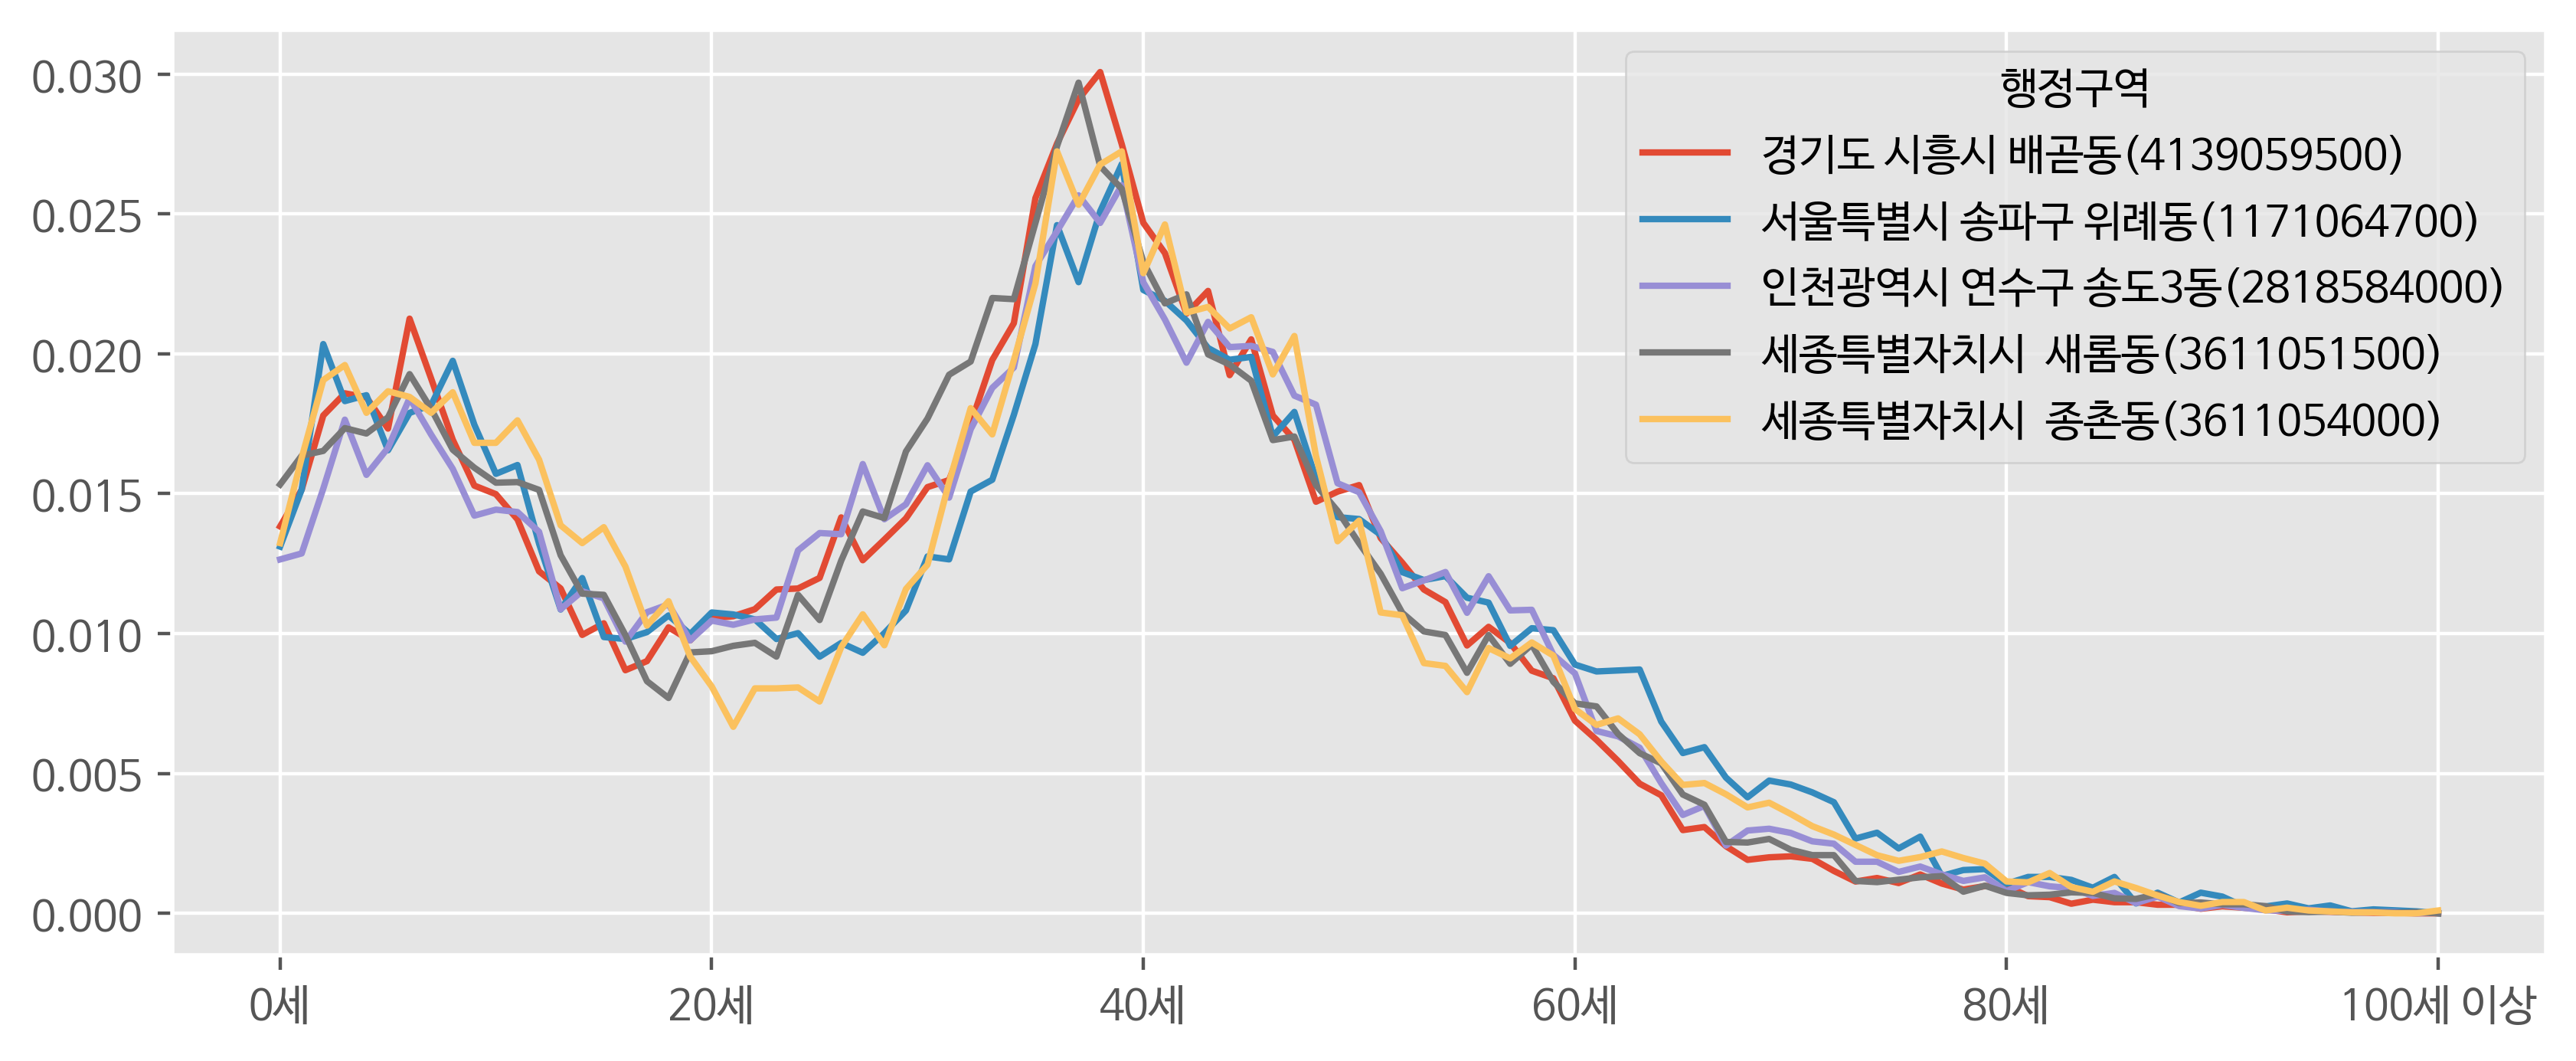

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['figure.dpi'] = 200
plt.style.use('ggplot')

#데이터 가져오기
df = pd.read_csv('age.csv',encoding='cp949', index_col=0)

# 전체 데이터를 총 인구수로 나눠서 비율로 변환
df = df.div(df['총인구수'],axis=0)

# 필요 없는 컬럼 제거
del df['총인구수'], df['연령구간인구수']

# 지역 이름 입력
name = input('원하는 지역의 이름을 입력해주세요 : ')

# 해당 행을 찾아서 해당 지역의 인구 구조를 저장
a = df.index.str.contains(name)
df2 = df[a] #인구 구조를 저장


# 인구 구조가 같은 지역 찾아 지도 시각화 TOP 5 (자기 자신 제외)
df.loc[np.power(df.sub(df2.iloc[0], axis =1), 2).sum(axis = 1).sort_values().index[1:6]].T.plot()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['figure.dpi'] = 200
plt.style.use('ggplot')

#데이터 가져오기
df = pd.read_csv('age.csv',encoding='cp949', index_col=0)

# 전체 데이터를 총 인구수로 나눠서 비율로 변환
df = df.div(df['총인구수'],axis=0)

# 필요 없는 컬럼 제거
del df['총인구수'], df['연령구간인구수']

# 지역 이름 입력
name = input('원하는 지역의 이름을 입력해주세요 : ')

# 해당 행을 찾아서 해당 지역의 인구 구조를 저장
a = df.index.str.contains(name)
df2 = df[a] #인구 구조를 저장

df2.iloc[0]


원하는 지역의 이름을 입력해주세요 : 


0세         0.005500
1세         0.006100
2세         0.006736
3세         0.007239
4세         0.007168
             ...   
96세        0.000231
97세        0.000160
98세        0.000121
99세        0.000090
100세 이상    0.000607
Name: 서울특별시  (1100000000), Length: 101, dtype: float64

In [ ]:
df.head()

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,38세,39세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),0.005500,0.006100,0.006736,0.007239,0.007168,0.007062,0.007817,0.007548,0.007741,0.007184,0.007596,0.008216,0.007653,0.007321,0.008017,0.008450,0.008401,0.009254,0.010977,0.011212,0.011700,0.012535,0.013254,0.014500,0.015416,0.015993,0.016955,0.016966,0.015636,0.015455,0.015370,0.014790,0.014769,0.014867,0.014599,0.016132,0.016881,0.017211,0.016667,0.016582,...,0.014622,0.013546,0.013879,0.012677,0.010576,0.011279,0.008501,0.008763,0.009020,0.008800,0.008803,0.008143,0.006208,0.006491,0.006080,0.007373,0.006241,0.005072,0.004855,0.004344,0.003817,0.003403,0.003040,0.002584,0.002098,0.001817,0.001485,0.001238,0.001098,0.000913,0.000737,0.000550,0.000407,0.000300,0.000288,0.000231,0.000160,0.000121,0.000090,0.000607
서울특별시 종로구 (1111000000),0.003879,0.004468,0.005069,0.005717,0.005573,0.005645,0.006692,0.005913,0.006620,0.006037,0.006567,0.007529,0.007091,0.006574,0.007189,0.007718,0.007660,0.008752,0.009995,0.011558,0.012422,0.013880,0.014345,0.016052,0.015947,0.016824,0.017543,0.016994,0.015999,0.014613,0.014430,0.014135,0.013475,0.012749,0.012350,0.014057,0.013841,0.014515,0.014410,0.014240,...,0.014829,0.014417,0.014292,0.013174,0.010891,0.011748,0.008909,0.009072,0.009511,0.009367,0.009890,0.008955,0.007189,0.007947,0.007483,0.009314,0.008144,0.006829,0.006966,0.005848,0.004991,0.004742,0.004095,0.003741,0.003022,0.002584,0.002198,0.001845,0.001544,0.001302,0.001066,0.000863,0.000733,0.000517,0.000451,0.000530,0.000347,0.000262,0.000255,0.001544
서울특별시 종로구 청운효자동(1111051500),0.005073,0.006072,0.005534,0.007533,0.007533,0.007225,0.008301,0.008378,0.008839,0.007302,0.009608,0.010915,0.009992,0.008071,0.010453,0.009531,0.010300,0.011606,0.011914,0.011299,0.013221,0.010992,0.013912,0.014450,0.010684,0.012529,0.013144,0.014297,0.011606,0.010530,0.012913,0.012068,0.013221,0.012298,0.012452,0.014835,0.013682,0.017832,0.018063,0.017371,...,0.011530,0.010607,0.012298,0.010069,0.010146,0.009531,0.006995,0.007917,0.008839,0.008148,0.009147,0.009070,0.007302,0.007917,0.007071,0.009608,0.007225,0.006687,0.007917,0.006380,0.004919,0.005150,0.004766,0.003613,0.003613,0.002383,0.002306,0.000922,0.001614,0.001076,0.000692,0.000615,0.001076,0.000461,0.000538,0.000692,0.000307,0.000154,0.000154,0.001230
서울특별시 종로구 사직동(1111053000),0.004487,0.005217,0.006678,0.006991,0.006991,0.007304,0.009808,0.006782,0.008556,0.006678,0.009182,0.007617,0.009182,0.007304,0.006678,0.007826,0.008034,0.007095,0.008452,0.010017,0.009912,0.011477,0.009704,0.010747,0.013251,0.012521,0.015755,0.014503,0.014295,0.013147,0.013251,0.017634,0.015651,0.012938,0.012521,0.014399,0.015338,0.015234,0.016590,0.013982,...,0.014295,0.014503,0.012208,0.011895,0.011060,0.012104,0.006782,0.009495,0.008869,0.008869,0.009912,0.008139,0.007721,0.008347,0.007095,0.008347,0.008556,0.007826,0.006886,0.007095,0.006260,0.005530,0.006260,0.005321,0.003965,0.002713,0.002295,0.002295,0.002087,0.001774,0.001461,0.000522,0.001252,0.000626,0.000522,0.000835,0.000209,0.000522,0.000417,0.001774
서울특별시 종로구 삼청동(1111054000),0.003191,0.005319,0.001064,0.007447,0.003901,0.004610,0.003191,0.005674,0.004965,0.008865,0.006383,0.009574,0.007092,0.006028,0.006738,0.006028,0.006028,0.009574,0.008156,0.009574,0.008865,0.012766,0.010284,0.012411,0.012411,0.011702,0.013121,0.010993,0.012766,0.014894,0.016312,0.012411,0.012411,0.014539,0.011348,0.014894,0.015957,0.020213,0.015248,0.017021,...,0.016312,0.014539,0.018085,0.018085,0.009574,0.015957,0.008156,0.008511,0.012766,0.012057,0.015248,0.010993,0.006738,0.009929,0.008156,0.011702,0.012057,0.008865,0.009220,0.005319,0.006383,0.007092,0.005674,0.0049

In [ ]:
df.mean(axis='index')

0세         0.004741
1세         0.005341
2세         0.005944
3세         0.006454
4세         0.006480
             ...   
96세        0.000422
97세        0.000256
98세        0.000173
99세        0.000122
100세 이상    0.000544
Length: 101, dtype: float64

In [ ]:
df.mean(axis=0)

0세         0.004741
1세         0.005341
2세         0.005944
3세         0.006454
4세         0.006480
             ...   
96세        0.000422
97세        0.000256
98세        0.000173
99세        0.000122
100세 이상    0.000544
Length: 101, dtype: float64

In [ ]:
df.mean(axis=1)

행정구역
서울특별시  (1100000000)             0.009901
서울특별시 종로구 (1111000000)          0.009901
서울특별시 종로구 청운효자동(1111051500)     0.009901
서울특별시 종로구 사직동(1111053000)       0.009901
서울특별시 종로구 삼청동(1111054000)       0.009901
                                  ...   
제주특별자치도 서귀포시 서홍동(5013058000)    0.009901
제주특별자치도 서귀포시 대륜동(5013059000)    0.009901
제주특별자치도 서귀포시 대천동(5013060000)    0.009901
제주특별자치도 서귀포시 중문동(5013061000)    0.009901
제주특별자치도 서귀포시 예래동(5013062000)    0.009901
Length: 3841, dtype: float64

In [ ]:
df.mean(axis='columns')

행정구역
서울특별시  (1100000000)             0.009901
서울특별시 종로구 (1111000000)          0.009901
서울특별시 종로구 청운효자동(1111051500)     0.009901
서울특별시 종로구 사직동(1111053000)       0.009901
서울특별시 종로구 삼청동(1111054000)       0.009901
                                  ...   
제주특별자치도 서귀포시 서홍동(5013058000)    0.009901
제주특별자치도 서귀포시 대륜동(5013059000)    0.009901
제주특별자치도 서귀포시 대천동(5013060000)    0.009901
제주특별자치도 서귀포시 중문동(5013061000)    0.009901
제주특별자치도 서귀포시 예래동(5013062000)    0.009901
Length: 3841, dtype: float64